In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os

In [2]:
#Mal se igram da bo lepsa koda
H =  np.arange(20).reshape(2,2,5)
print(H)

#H[H%2==0] = -1

#print(len(H))


#test
test = H.reshape(-1,2)

a = np.arange(10)
b = a[::-1]
print(a, b)

print(np.minimum(a,b))

#print(H.reshape(-1))

#index = [2,2]
#print(H[tuple(index)])

#default size = [6.0, 4.0]
backupPlotSize = [6.0, 4.0]
print(plt.rcParams["figure.figsize"])

x = np.arange(10)
x[:] = [i*2 for i in range(0,10)]
print(x)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]]
[0 1 2 3 4 5 6 7 8 9] [9 8 7 6 5 4 3 2 1 0]
[0 1 2 3 4 4 3 2 1 0]
[6.0, 4.0]
[ 0  2  4  6  8 10 12 14 16 18]


## 1.a) myHist3

(550, 550, 3)
True
float64


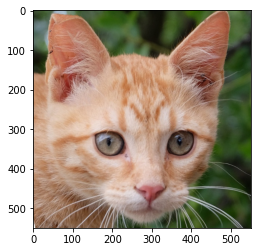

In [3]:


image = cv2.imread("images/cat1.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
height, width, depth = image.shape
plt.imshow(image)
print(image.shape)

nBins = 5
binSize = 255 // nBins

def myHist3(image, nBins):
    binSize = 255 // nBins
    hist = np.zeros((nBins,nBins,nBins))

    #najprej reshapamo da dobimo po dimenzijah
    pixels = image.reshape(-1,3)

    #nardimo array indexov
    indexes = (pixels // binSize)

    #porezemo prevelke vrednosti
    indexes[indexes >= nBins] = nBins-1

    #uporabmo te indexe da povecamo vrednost v histogramu
    for index in indexes:
        hist[tuple(index)] += 1

    #normaliziramo
    hist = hist / len(indexes)

    return hist

hist=myHist3(image,nBins)

def myHist3Loop(image, nBins):
    height, width, depth = image.shape
    binSize = 255 // nBins
    hist = np.zeros((nBins,nBins,nBins))
    #odrezemo prevelke
    image = image // binSize
    image[image >= nBins] = nBins-1

    hist = np.zeros((nBins,nBins,nBins))

    #manj ucinkovito
    for x in range(0,width):
        for y in range(0, height):
            coordR, coordG, coordB = image[x,y]
            hist[coordR, coordG, coordB] += 1
    #normaliziramo
    hist = hist / (height*width)
    return hist

def myHist3NonNormed(image, nBins):
    binSize = 255 // nBins
    hist = np.zeros((nBins,nBins,nBins))
    pixels = image.reshape(-1,3)
    indexes = (pixels // binSize)
    indexes[indexes >= nBins] = nBins-1
    for index in indexes:
        hist[tuple(index)] += 1
    return hist.reshape(-1)
    
hist2 = myHist3Loop(image,nBins)


print(np.array_equal(hist, hist2))
print(hist.dtype)


## 1.b) Comparing histograms

In [4]:
def getEuclidean(hist1, hist2):
    hist1 = hist1.reshape(-1)
    hist2 = hist2.reshape(-2)

    return np.sqrt(np.sum((hist1-hist2)**2))

def getChiSq(hist1, hist2):
    hist1 = hist1.reshape(-1)
    hist2 = hist2.reshape(-2)
    e0 = 10**-10

    return 0.5*np.sum(((hist1-hist2)**2)/(hist1 + hist2 + e0))

def getIntersection(hist1, hist2):
    hist1 = hist1.reshape(-1)
    hist2 = hist2.reshape(-2)

    return 1-sum(np.minimum(hist1,hist2))

def getHellinger(hist1, hist2):
    hist1 = hist1.reshape(-1)
    hist2 = hist2.reshape(-2)

    return np.sqrt(0.5*np.sum( (np.sqrt(hist1) - np.sqrt(hist2))**2 ))

def compareHistograms(hist1, hist2, method):
    if(method == "eu"):
        return getEuclidean(hist1, hist2)
    elif (method == "ch"):
        return getChiSq(hist1, hist2)
    elif (method == "in"):
        return getIntersection(hist1, hist2)
    elif (method == "he"):
        return getHellinger(hist1, hist2)
    else:
        print("Wrong argument!")


## 1.c) Testing on images

         1:1         1:2              1:3
Euclid:  0.0 0.4286686087807705 0.10016038371347015
ChiSq:  0.0 0.44831717902789886 0.13931061039504697
Inter:  0.0 0.618896484375 0.21258544921875
Heli:  0.0 0.5788106610243834 0.3271623945625367


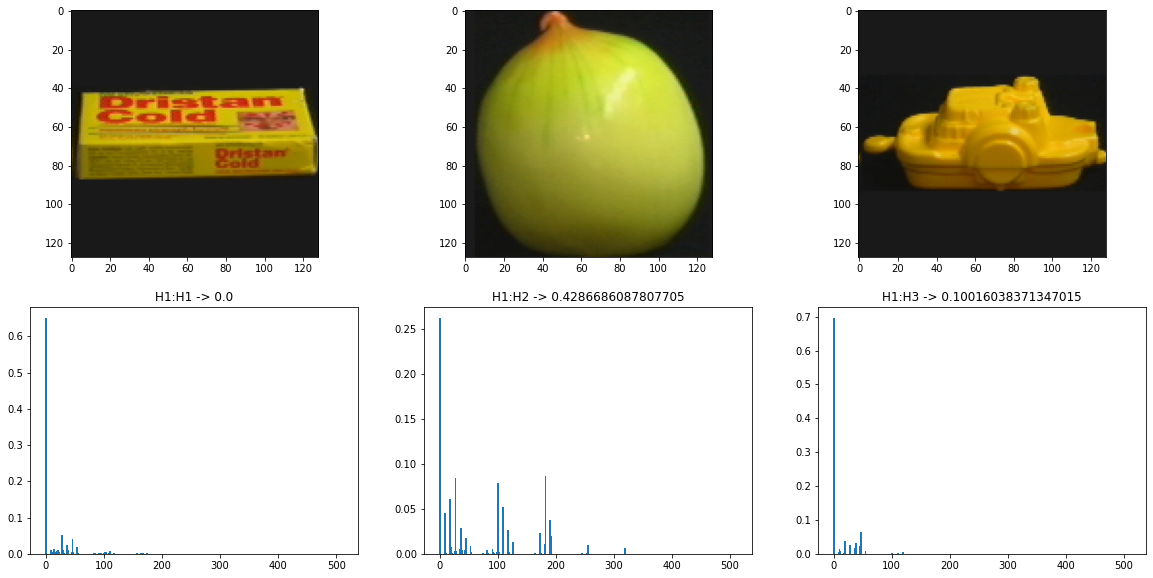

In [5]:
nBins = 8

object1 = cv2.imread("dataset/object_01_1.png")
object2 = cv2.imread("dataset/object_02_1.png")
object3 = cv2.imread("dataset/object_03_1.png")


hist1 = myHist3(object1, nBins)
hist2 = myHist3(object2, nBins)
hist3 = myHist3(object3, nBins)

print("         1:1         1:2              1:3")
print("Euclid: ", compareHistograms(hist1,hist1,"eu"), compareHistograms(hist1,hist2,"eu"), compareHistograms(hist1,hist3,"eu"))
print("ChiSq: ", compareHistograms(hist1,hist1,"ch"), compareHistograms(hist1,hist2,"ch"), compareHistograms(hist1,hist3,"ch"))
print("Inter: ", compareHistograms(hist1,hist1,"in"), compareHistograms(hist1,hist2,"in"), compareHistograms(hist1,hist3,"in"))
print("Heli: ", compareHistograms(hist1,hist1,"he"), compareHistograms(hist1,hist2,"he"), compareHistograms(hist1,hist3,"he"))

object1 = cv2.cvtColor(object1, cv2.COLOR_BGR2RGB)
object2 = cv2.cvtColor(object2, cv2.COLOR_BGR2RGB)
object3 = cv2.cvtColor(object3, cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"] = [20,10]
plt.subplot(231)
plt.imshow(object1)
plt.subplot(232)
plt.imshow(object2)
plt.subplot(233)
plt.imshow(object3)
plt.subplot(234)
plt.title("H1:H1 -> " + str(compareHistograms(hist1,hist1,"eu")))
plt.bar(np.arange(nBins**3), hist1.reshape(-1), width=3)
plt.subplot(235)
plt.title("H1:H2 -> " + str(compareHistograms(hist1,hist2,"eu")))
plt.bar(np.arange(nBins**3), hist2.reshape(-1), width=3)
plt.subplot(236)
plt.title("H1:H3 -> " + str(compareHistograms(hist1,hist3,"eu")))
plt.bar(np.arange(nBins**3), hist3.reshape(-1), width=3)


plt.rcParams["figure.figsize"] = backupPlotSize



## 1.d) Image retrieval

Poglej si numpy structured array https://numpy.org/doc/stable/user/basics.rec.html

### Tole je ful kul
```
dtype = [('filename', str), ('image', object), ('hist', object), ('euclidean', float), ('chiSq', float), ('inter', float), ('heli', float)]
sortedHelli = np.array(resultList, dtype=dtype)       # create a structured array

#sortiramo po heli
sorted = np.sort(sortedHelli, order='heli')

#indexiranje po dveh elementih, prvih 6
print(sorted[['filename','heli']][:6])
```


[(b'object_05_4.png', 0.        ) (b'object_05_3.png', 0.14591655)
 (b'object_05_2.png', 0.15672255) (b'object_05_1.png', 0.16112705)
 (b'object_22_2.png', 0.36511311) (b'object_22_4.png', 0.36654932)]


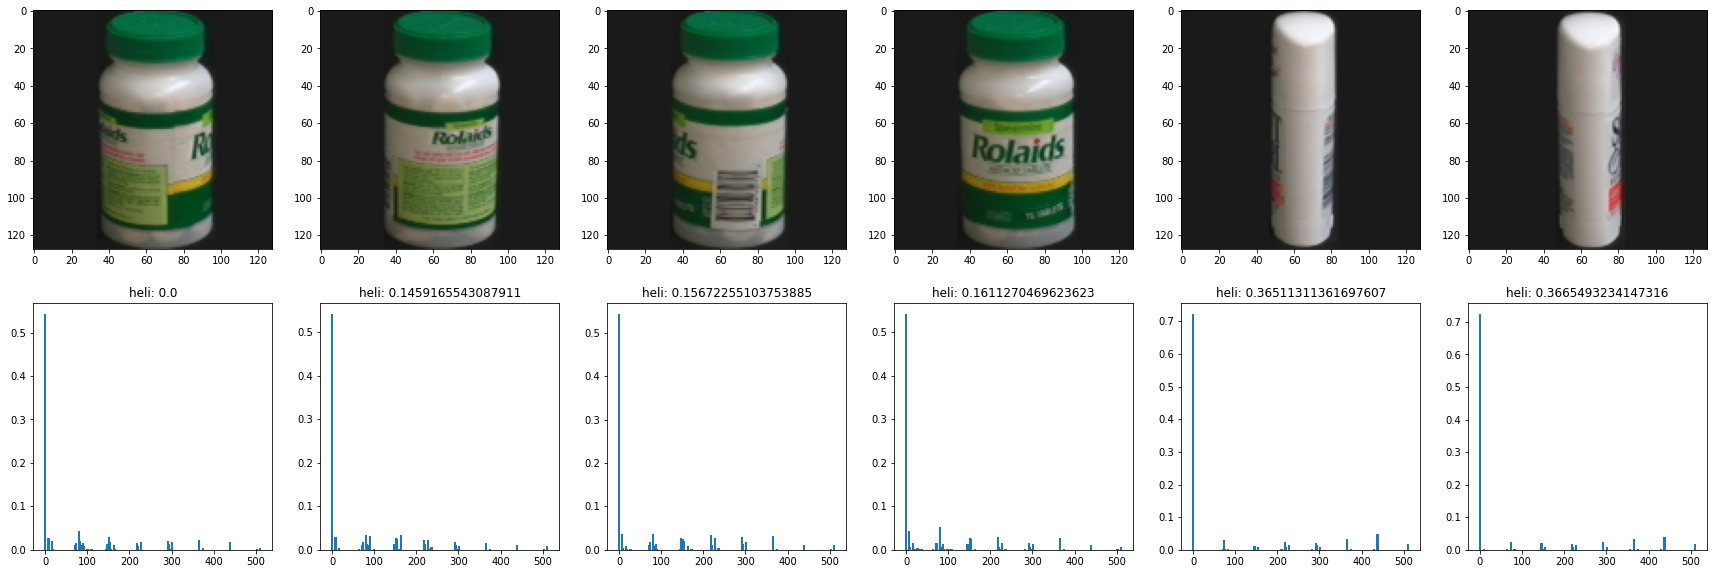

In [6]:
nBins = 8

path = "dataset/"

selectedImage = "object_05_4.png"
selectedImage = cv2.imread(path+selectedImage)
selectedHist = myHist3(selectedImage, nBins)

#print(len(os.listdir(path)))
#resultList = np.empty([len(os.listdir(path)), 7])

resultList = []

#primerjaj izbrano sliko z vsemi v folderju
for filename in os.listdir(path):
    image = cv2.imread(path + filename)
    hist = myHist3(image, nBins)
    euclidean = getEuclidean(selectedHist, hist)
    chiSq = getChiSq(selectedHist, hist)
    inter = getIntersection(selectedHist, hist)
    heli = getHellinger(selectedHist, hist)
    
    #dodamo vse parametre resitve v seznam
    resultImage = (filename, image, hist.reshape(-1), euclidean, chiSq, inter, heli)
    resultList.append(resultImage)

#POGLEJ numpy STRUCTURED ARRAY, okej tole za stringe je bizarno ampak jebiga, tale S30
dtype = [('filename', 'S30'), ('image', object), ('hist', object), ('euclidean', float), ('chiSq', float), ('inter', float), ('heli', float)]
npArrayResults = np.array(resultList, dtype=dtype)       # create a structured array

#izberi po kateri razdalji merimo
#euclidean chiSq inter heli
distanceMeasure = "heli"
sortedByDistance = np.sort(npArrayResults, order=distanceMeasure)

#indexiranje po dveh elementih
print(sortedByDistance[['filename',distanceMeasure]][:6])




#plotting, rabmo mal vecje
plt.rcParams["figure.figsize"] = [30,10]

i = 1
for image in sortedByDistance['image'][:6]:
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,6,i)
    plt.imshow(rgb)
    i += 1

for hist, distance in sortedByDistance[['hist', distanceMeasure]][:6]:
    plt.subplot(2,6,i)
    plt.title(distanceMeasure +": "+ str(distance))
    plt.bar(np.arange(nBins**3), hist, width=5)
    i += 1
    

plt.rcParams["figure.figsize"] = backupPlotSize


## 1.e) Razdalja med izbrano in vsemi slikami

x-os - slike
y-os - podobnosti

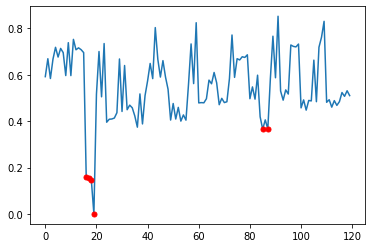

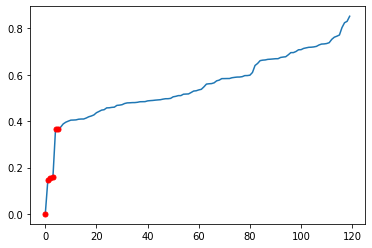

In [7]:
plt.plot(np.arange(len(npArrayResults)), npArrayResults[distanceMeasure])

i=0
for similarPoint in sortedByDistance[:6]:
    #np where je da najdes x indexe
    plt.plot(np.where(npArrayResults[distanceMeasure] == similarPoint[distanceMeasure]),similarPoint[distanceMeasure], marker='o', markersize=5, color="red")

plt.show()

#sorted
plt.plot(np.arange(len(npArrayResults)), sortedByDistance[distanceMeasure])

for similarPoint in sortedByDistance[:6]:
    #np where je da najdes x indexe
    plt.plot(np.where(sortedByDistance[distanceMeasure] == similarPoint[distanceMeasure]),similarPoint[distanceMeasure], marker='o', markersize=5, color="red")



## 1.f)  Weighterd

(512,)
(512,)
[(b'object_05_4.png', 0.        ) (b'object_05_2.png', 0.14857184)
 (b'object_05_3.png', 0.1630627 ) (b'object_05_1.png', 0.16573487)
 (b'object_08_1.png', 0.29785605) (b'object_08_3.png', 0.30380538)]


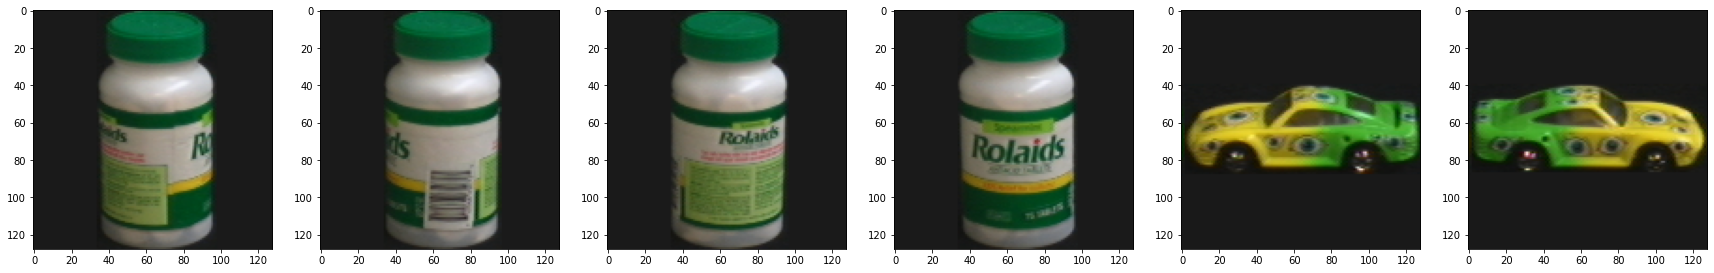

In [8]:
def normHist(hist):
    return hist/sum(hist)

nBins = 8

resultList = []

selectedHist = myHist3(selectedImage, nBins).reshape(-1)

#primerjaj izbrano sliko z vsemi v folderju
for filename in os.listdir(path):
    image = cv2.imread(path + filename)
    hist = myHist3(image, nBins)
    heli = 1
    #dodamo vse parametre resitve v seznam
    resultImage = (filename, image, hist.reshape(-1), heli)

    resultList.append(resultImage)

dtype = [('filename', 'S30'), ('image', object), ('hist', object), ('heli', float)]
npArrayResults = np.array(resultList, dtype=dtype)       # create a structured array
distanceMeasure = "heli"

sortedByDistance = np.sort(npArrayResults, order=distanceMeasure)


scalingFactor = 3

combinedFrequency = np.sum(npArrayResults["hist"])
print(combinedFrequency.shape)
weights = np.exp(-scalingFactor * combinedFrequency)
print(weights.shape)



#A JIH JE TREBA ŠE ENKRAT NORMALIZIRAT ??
selectedHist = selectedHist* weights
selectedHist = normHist(selectedHist)

#toole čudo od sintakse
#utezimo
npArrayResults["hist"][:] = [hist * weights for hist in npArrayResults["hist"]]

#normaliziramo utezene
npArrayResults["hist"][:] = [normHist(hist) for hist in npArrayResults["hist"]]

#izracunamo razdaljo od vseh
npArrayResults["heli"][:] = [np.sqrt(np.sum((selectedHist-hist)**2)) for hist in npArrayResults["hist"]]

#na novo jih dobi
distanceMeasure = "heli"
sortedByDistance = np.sort(npArrayResults, order="heli")

#indexiranje po dveh elementih
print(sortedByDistance[['filename',distanceMeasure]][:6])




#plotting, rabmo mal vecje
plt.rcParams["figure.figsize"] = [30,10]

i = 1
for image in sortedByDistance['image'][:6]:
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.subplot(2,6,i)
    plt.imshow(rgb)
    i += 1

plt.rcParams["figure.figsize"] = backupPlotSize






# 2. Convolution

Uno izbolšavo k greš dvakrat skoz loh nardis pr konvoluciji z gaussom, pri mediani naprimer tega ne mors narest.

Correlation is measurement of the similarity between two signals/sequences.
Convolution is measurement of effect of one signal on the other signal.



## 2.a) Nared na roko pa dej sliko notr


## 2.b) Simple 1d convolution

0.9999999974


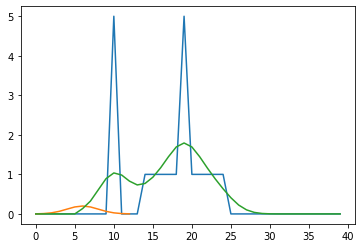

In [18]:
def convolve(signal, kernel):
    #mormo flippnt kernel
    kernel = np.flip(kernel)

    kernelLen = len(kernel)
    N = kernelLen // 2

    convolution = np.zeros(len(signal))

    for i in range(N, len(signal)-N):
        convolution[i] = np.dot(signal[i-N:i+N+1], kernel)

    return convolution

signal = np.loadtxt("signal.txt")
kernel = np.loadtxt("kernel.txt")


print(sum(kernel))

convolution = convolve(signal, kernel)

plt.plot(signal)
plt.plot(kernel)
plt.plot(convolution)


## 2.c) Padding

(40,) (40,)


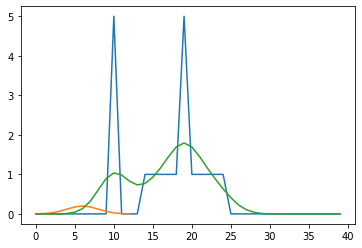

In [20]:
def convolutionWithPadding(signal, kernel):
    kernel = np.flip(kernel)

    kernelLen = len(kernel)
    N = kernelLen // 2

    convolution = np.zeros(len(signal))

    padding = np.zeros(N)
    # 0 - pad the signal - dodamo N nicel na zacetek signala da gre skoz
    signal = np.concatenate([padding, signal, padding])

    #lohka z edgom nadaljujemo, paddingLeft = signal[0], paddingRight = signal[-1]

    #lohka ze ugrajeno
    #np.pad(signal, (N, N), 'edge')
    

    for i in range(N, len(convolution)+1):
        convolution[i-N] = np.dot(signal[i-N:i+N+1], kernel)

    return convolution

convolution = convolutionWithPadding(signal, kernel)
print(signal.shape, convolution.shape)

plt.plot(signal)
plt.plot(kernel)
plt.plot(convolution)

## 2.d) Gaussian kernel

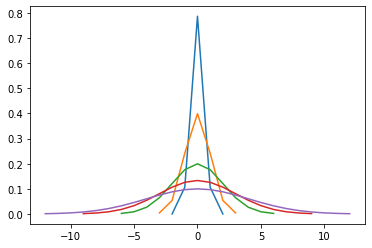

In [ ]:
#vrne gaus in x - definicijsko obmocje
def getGaussianKernelAndDef(stDev):
    kerSize = int(2*3*stDev + 1)

    #dolocimo "definicijsko obmocje"
    x=np.arange(-(kerSize // 2),(kerSize // 2)+1 )

    gaus = np.exp(-(x**2)/(2*stDev**2))/ (np.sqrt(2*np.pi)*stDev)

    #normaliziramo
    gaus = gaus/sum(gaus)

    #vrnemo kernel in definicijsko
    return gaus, x


#vrne samo kernel brez definicijskega obmocja
def getGaussianKernel(stDev):
    kerSize = int(2*3*stDev + 1)
    x=np.arange(-(kerSize // 2),(kerSize // 2)+1 )
    gaus = np.exp(-(x**2)/(2*stDev**2))/ (np.sqrt(2*np.pi)*stDev)
    gaus = gaus/sum(gaus)
    return gaus


gausKer, x = getGaussianKernelAndDef(0.5)
plt.plot(x, gausKer)

gausKer, x= getGaussianKernelAndDef(1)
plt.plot(x, gausKer)

gausKer, x = getGaussianKernelAndDef(2)
plt.plot(x, gausKer)

gausKer, x = getGaussianKernelAndDef(3)
plt.plot(x, gausKer)

gausKer, x = getGaussianKernelAndDef(4)
plt.plot(x, gausKer)


## 2.e)

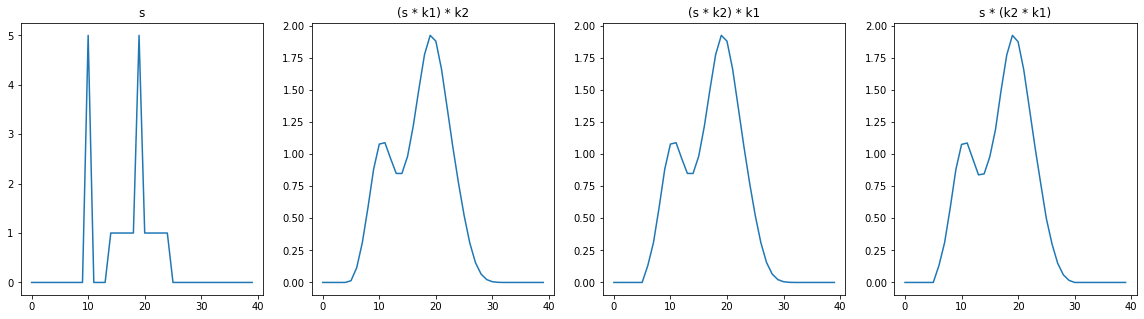

In [ ]:
k1 = getGaussianKernel(2)
k2 = [0.1, 0.6, 0.4]

signal = np.loadtxt("signal.txt")

convolution = convolve (signal, k1)
convolution = convolve(convolution, k2)

convolution2 = convolve (signal, k2)
convolution2 = convolve(convolution2, k1)

#convolve k1 with k2
k3= convolve(k1,k2)
convolution3 = convolve (signal, k3)

#plotting, rabmo mal vecje
plt.rcParams["figure.figsize"] = [20,5]

plt.subplot(1,4,1)
plt.title("s")
plt.plot(signal)

plt.subplot(1,4,2)
plt.title("(s * k1) * k2")
plt.plot(convolution)
plt.subplot(1,4,3)
plt.title("(s * k2) * k1")
plt.plot(convolution2)
plt.subplot(1,4,4)
plt.title("s * (k2 * k1)")
plt.plot(convolution3)

plt.rcParams["figure.figsize"] = backupPlotSize


# 3. Image filtering

In [ ]:
#functions for corrupting
def gauss_noise(I, magnitude):
	# input: image, magnitude of noise

	return I+np.random.rand(I.shape[0], I.shape[1])*magnitude

def sp_noise(I, percent):
	# input: image, percent of corrupted pixels
	res = I.copy()

	res[np.random.rand(I.shape[0], I.shape[1])<percent]=255
	res[np.random.rand(I.shape[0], I.shape[1])<percent]=0

	return res

## 3.a) Gaussian filter

(1, 13)


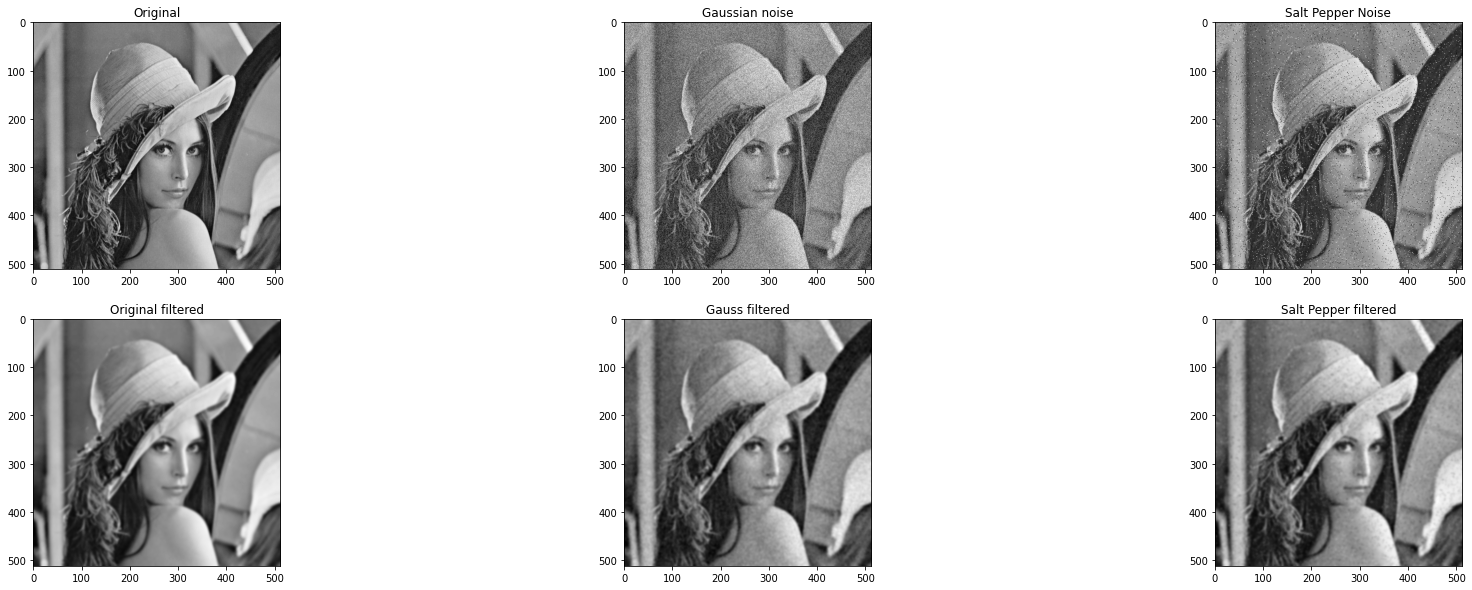

In [ ]:
#za 3.a) je to prakticno gauss filter
def applyFilter(image, kernel):
    #dvakrat gremo skoz, enkrat transponiramo namest n^2 -> 2n
    imageFiltered = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    imageFiltered = cv2.filter2D(imageFiltered, ddepth=-1, kernel=kernel.T)

    return imageFiltered


lena = cv2.imread("images/lena.png")
lena = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY)

#builtin
gaussian_blurBuiltin = cv2.GaussianBlur(src=lena, ksize=(5,5), sigmaX=0, sigmaY=0)

#ce ga dam v [] dobim shape (1,13) namest (13,), torej ga lahko transponiram
gausKer =  np.array([getGaussianKernel(2)])
print(gausKer.shape)


lenaFiltered = applyFilter(lena, gausKer)


gausNoise = gauss_noise(lena, 100)
saltPepperNoise = sp_noise(lena, 0.02)


gausFiltered = applyFilter(gausNoise, gausKer)
saltPepperFiltered = applyFilter(saltPepperNoise, gausKer)


#plotting, rabmo mal vecje
plt.rcParams["figure.figsize"] = [30,10]

plt.subplot(2,3,1)
plt.title("Original")
plt.imshow(lena, cmap="gray")

plt.subplot(2,3,2)
plt.title("Gaussian noise")
plt.imshow(gausNoise, cmap="gray")

plt.subplot(2,3,3)
plt.title("Salt Pepper Noise")
plt.imshow(saltPepperNoise, cmap="gray")

plt.subplot(2,3,4)
plt.title("Original filtered")
plt.imshow(lenaFiltered, cmap="gray")

plt.subplot(2,3,5)
plt.title("Gauss filtered")
plt.imshow(gausFiltered, cmap="gray")

plt.subplot(2,3,6)
plt.title("Salt Pepper filtered")
plt.imshow(saltPepperFiltered, cmap="gray")

plt.rcParams["figure.figsize"] = backupPlotSize

## 3.b) Sharpeneing

[[-0.11111111 -0.11111111 -0.11111111]
 [-0.11111111  1.88888889 -0.11111111]
 [-0.11111111 -0.11111111 -0.11111111]]


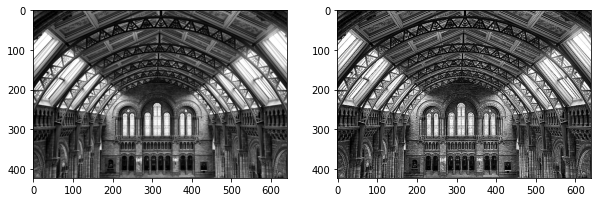

In [ ]:
museum = cv2.imread("images/museum.jpg")
museum = cv2.cvtColor(museum, cv2.COLOR_BGR2GRAY)



#nardimo sharpFilter po definiciji iz slidov
sharpFilter = np.zeros((3,3))
sharpFilter[1,1] = 2
sharpFilter = sharpFilter - np.ones((3,3))/9
print(sharpFilter)

museumSharp = applyFilter(museum, sharpFilter)

plt.rcParams["figure.figsize"] = [10,5]
plt.subplot(121)
plt.imshow(museum, cmap="gray")
plt.subplot(122)
plt.imshow(museumSharp, cmap="gray")
plt.rcParams["figure.figsize"] = backupPlotSize

## 3.c) Nonlinear median filter

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


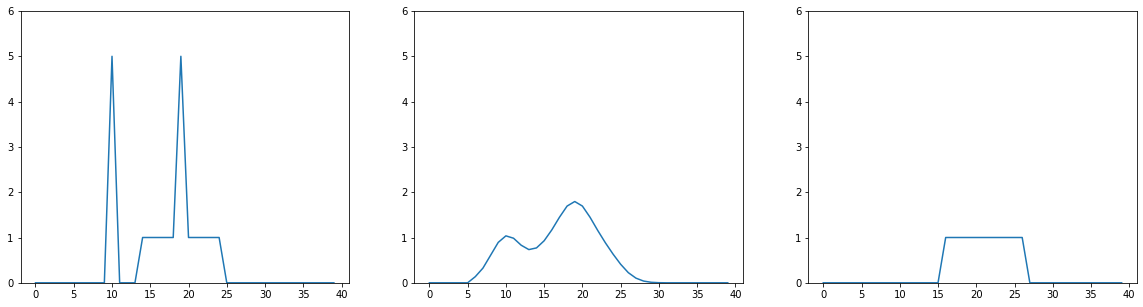

In [ ]:
def simpleMedian(signal, kernelSize):
    
    lenSignal = len(signal)

    medianFiltered = np.zeros(lenSignal)

    signal = np.pad(signal, (kernelSize//2, kernelSize//2), 'edge')

    for i in range (kernelSize//2,lenSignal):
        median = np.median(signal[i-kernelSize//2:i+kernelSize//2+1])
        medianFiltered[i] = median

    return medianFiltered


signal = np.loadtxt("signal.txt")
simpleMedianFiltered = simpleMedian(signal, 5)
print(simpleMedianFiltered)

plt.rcParams["figure.figsize"] = [20,5]
plt.subplot(131)
plt.ylim(0,6) #to dolocs scale na outputu
plt.plot(signal)
plt.subplot(132)
plt.ylim(0,6)
plt.plot(convolve (signal, k1))
plt.subplot(133)
plt.ylim(0,6)
plt.plot(simpleMedianFiltered)

plt.rcParams["figure.figsize"] = backupPlotSize



## 3.d) 2D median filter

helpo
(512, 512)
helpo
(512, 512)


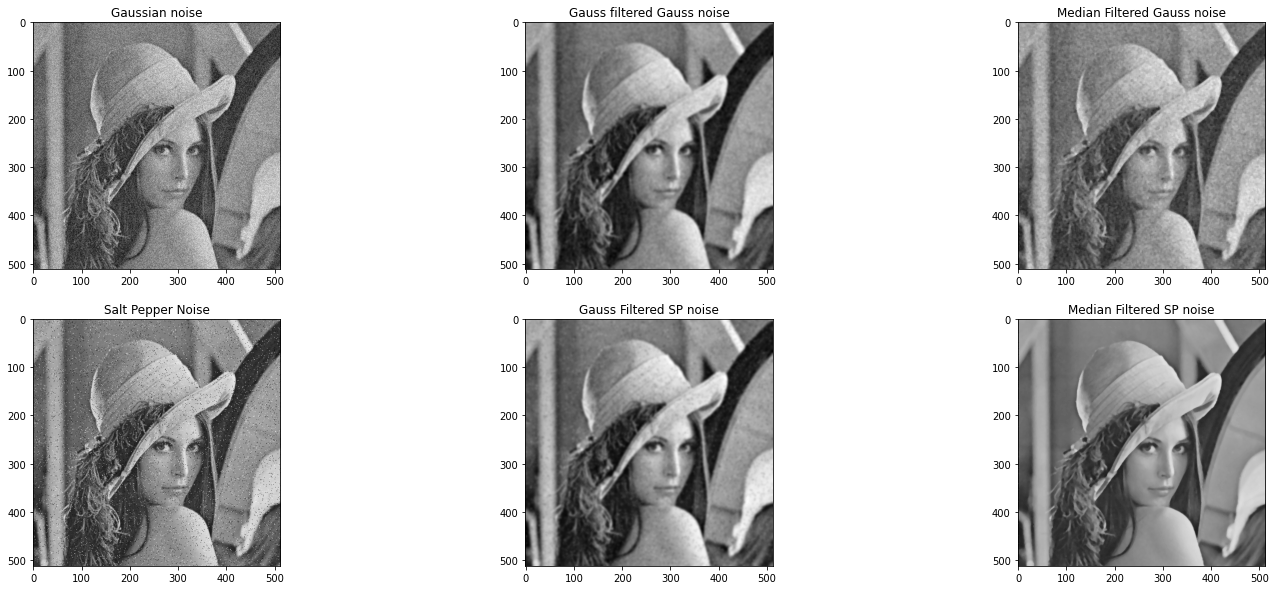

In [ ]:
# test = np.arange(16).reshape(4,4)
# print(test)
# print(np.pad(test, (1), mode="edge"))
# print(test[2,1])
# print(np.mean(test[3-2:3+2+1, 3-2:3+2+1]))



def medianFilter2D(image, windowSize):
    #mal janky, ampak sam da lazji indexiram
    windowSizeHalf = windowSize//2

    (height, width) = image.shape

    medianFiltered = np.copy(image)
    print("helpo")
    print(medianFiltered.shape)

    image=np.pad(image, windowSizeHalf, mode="edge")
    for y in range(windowSizeHalf, height):
        for x in range(windowSizeHalf, width):
            # dobi median od enga okna
            medianFiltered[y,x] = int(np.median(image[y-windowSizeHalf: y+windowSizeHalf+1, x-windowSizeHalf: x+windowSizeHalf+1]))

    return medianFiltered


GAUSmedianFiltered2D = medianFilter2D(gausNoise, 5)
SPmedianFiltered2D = medianFilter2D(saltPepperNoise, 5)



plt.rcParams["figure.figsize"] = [25,10]

plt.subplot(2,3,1)
plt.title("Gaussian noise")
plt.imshow(gausNoise, cmap="gray")

plt.subplot(2,3,2)
plt.title("Gauss filtered Gauss noise")
plt.imshow(gausFiltered, cmap="gray")

plt.subplot(2,3,3)
plt.title("Median Filtered Gauss noise")
plt.imshow(GAUSmedianFiltered2D, cmap="gray")

plt.subplot(2,3,4)
plt.title("Salt Pepper Noise")
plt.imshow(saltPepperNoise, cmap="gray")

plt.subplot(2,3,5)
plt.title("Gauss Filtered SP noise")
plt.imshow(saltPepperFiltered, cmap="gray")

plt.subplot(2,3,6)
plt.title("Median Filtered SP noise")
plt.imshow(SPmedianFiltered2D, cmap="gray")

plt.rcParams["figure.figsize"] = backupPlotSize



## 3.e) Hybrid image approach
nardiš 1d array dolžine 2n+1 in sredinski element daš na 1 in od tega odšteješ gaussa velikosti 2n+1 in pol ga applyas  


Builtin: the Laplacian is computed by filtering the image with the following 3×3 aperture:

$B = \begin{bmatrix} 0 & 1 & 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0 \end{bmatrix}$

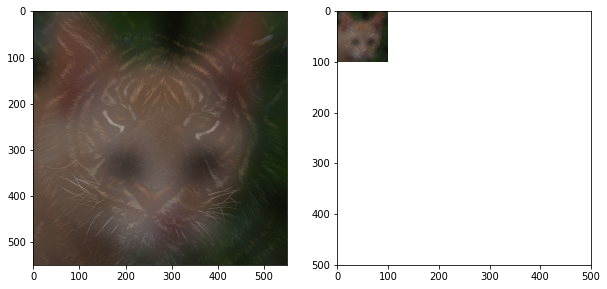

In [ ]:
#lapacian filter

cat1 = cv2.imread("images/cat1.jpg")
cat1 = cv2.cvtColor(cat1, cv2.COLOR_BGR2RGB)
cat2 = cv2.imread("images/cat2.jpg")
cat2 = cv2.cvtColor(cat2, cv2.COLOR_BGR2RGB)


laplacian = cv2.Laplacian(cat2, ddepth=-1, ksize=3)
#laplacian = cv2.Laplacian(cat2,cv2.CV_64F)

gausKer1 =  np.array([getGaussianKernel(20)])

catGauss = applyFilter(cat1, gausKer1)


#laplacian filter - vse 0 razen 1 na sredini, odstejes gaussa
laplacianFilter = np.zeros(gausKer1.shape)
#nastav sredinskiga na 0
laplacianFilter[0,laplacianFilter.shape[1]//2] = 1
laplacianFilter = laplacianFilter-gausKer1


catLaplacian = applyFilter(cat2, laplacianFilter)

plt.rcParams["figure.figsize"] = [10,5]

#zdruzimo slike, ce delis z dva pride lepse
combinedImages=catGauss//2 + catLaplacian//2

#combinedImages= catGauss + catLaplacian



plt.subplot(121)
plt.imshow(combinedImages)
plt.subplot(122)
plt.ylim(500,0)
plt.xlim(0,500)
plt.imshow(cv2.resize(combinedImages, (100, 100)))

plt.rcParams["figure.figsize"] = backupPlotSize
